# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv("data/checker_regression.csv")
df.fillna(0, inplace=True)
df = df.groupby(['uid', 'num_commits']).sum().reset_index()
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,168.0,0.000000
1,user_10,20,534.0,0.000000
2,user_11,7,0.0,-2.000000
3,user_12,86,0.0,-89.000000
4,user_13,52,0.0,-48.500000
5,user_14,61,572.0,0.000000
6,user_15,23,0.0,-17.500000
7,user_16,41,0.0,-39.333333
8,user_17,51,282.0,0.000000
9,user_18,5,12.0,0.000000


In [3]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print("Train X:", X_train.shape)
print("Test X:", X_test.shape)

Train X: (23, 2)
Test X: (6, 2)


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [5]:
def crossval(n_splits, X, y, model_factory):
    """
    K-fold kross-validatsiya yordamida regressiya modelini baholaydi.

    Args:
        n_splits (int): KFold uchun bo'linishlar soni.
        X (pd.DataFrame): Xususiyatlar DataFrame'i.
        y (pd.Series): Maqsad o'zgaruvchisi Series'i.
        model_factory (callable): Modelning har bir fold uchun instansiyasini
                                  qaytaruvchi funksiya (masalan, lambda: LinearRegression()).

    Returns:
        float: Test to'plamlaridagi o'rtacha RMSE.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    test_rmses = []

    print(f"\nKross-validatsiya natijalari ({n_splits}-fold):")
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Modelni model_factory funksiyasini chaqirish orqali instansiyalaymiz
        model = model_factory()

        model.fit(X_train_fold, y_train_fold)

        y_train_pred = model.predict(X_train_fold)
        y_test_pred = model.predict(X_test_fold)

        train_rmse = np.sqrt(mean_squared_error(y_train_fold, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test_fold, y_test_pred))

        print(f"train - {train_rmse}   |   test - {test_rmse}")
        test_rmses.append(test_rmse)

    average_rmse = np.mean(test_rmses)
    print(f"Average RMSE on crossval is {average_rmse}")
    return average_rmse

In [6]:
print("\n--- LinearRegression uchun kross-validatsiya ---")
crossval(n_splits=10, X=X_train, y=y_train, model_factory=lambda: LinearRegression())


--- LinearRegression uchun kross-validatsiya ---

Kross-validatsiya natijalari (10-fold):
train - 53.39876440582032   |   test - 115.35840063311619
train - 62.483648539393116   |   test - 69.42784038047778
train - 64.79995273614007   |   test - 52.68687515180753
train - 64.18691065353337   |   test - 76.33202657651778
train - 63.63834103600402   |   test - 58.850081104133665
train - 65.48051743507484   |   test - 32.07643259232066
train - 64.4826822200063   |   test - 48.617249971641506
train - 61.28552227333201   |   test - 82.52212687903163
train - 64.77196653723476   |   test - 43.80381550249039
train - 62.86945407212118   |   test - 70.62128965173797
Average RMSE on crossval is 65.0296138443275


65.0296138443275

In [7]:
print("\n--- DecisionTreeRegressor uchun kross-validatsiya ---")
crossval(n_splits=10, X=X_train, y=y_train, model_factory=lambda: DecisionTreeRegressor(max_depth=10, random_state=21))


--- DecisionTreeRegressor uchun kross-validatsiya ---

Kross-validatsiya natijalari (10-fold):
train - 0.0   |   test - 43.200154320712016
train - 0.0   |   test - 83.15046156973068
train - 0.0   |   test - 9.093266739736606
train - 0.0   |   test - 8.60313250443633
train - 0.0   |   test - 80.25661966467314
train - 0.0   |   test - 15.202795795510772
train - 0.0   |   test - 40.58792924010783
train - 0.0   |   test - 37.190388543278225
train - 0.0   |   test - 50.4874241767195
train - 0.0   |   test - 57.982756057296896
Average RMSE on crossval is 42.5754928612202


42.5754928612202

In [8]:
print("\n--- RandomForestRegressor uchun kross-validatsiya ---")
crossval(n_splits=10, X=X_train, y=y_train, model_factory=lambda: RandomForestRegressor(n_estimators=100, max_depth=15, random_state=21, n_jobs=-1)) # n_jobs=-1 qo'shildi



--- RandomForestRegressor uchun kross-validatsiya ---

Kross-validatsiya natijalari (10-fold):
train - 19.85306588532919   |   test - 76.53685427174811
train - 22.671373358544045   |   test - 81.61793883314117
train - 21.694829255044972   |   test - 7.39802372258971
train - 22.727278408638295   |   test - 9.177142450433893
train - 24.532640102756506   |   test - 70.14702143355768
train - 19.91670169081067   |   test - 40.07320878716852
train - 20.676053648960917   |   test - 55.68347292110613
train - 22.362019666379048   |   test - 22.92156316416677
train - 18.972031532693418   |   test - 26.447489505149523
train - 16.74899614464027   |   test - 69.2819559228808
Average RMSE on crossval is 45.92846710119423


45.92846710119423

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [9]:
# Modellar va ularning parametrlari
models_to_evaluate = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor (max_depth=10)": DecisionTreeRegressor(max_depth=10, random_state=21),
    "Random Forest Regressor (n_est=100, max_depth=15)": RandomForestRegressor(n_estimators=100, max_depth=15, random_state=21, n_jobs=-1)
}

results = {}

print("\n--- Test to'plamida bashoratlar va baholash ---")
for model_name, model in models_to_evaluate.items():
    print(f"\nModel: {model_name}")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Baholash metrikalarini hisoblaymiz
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"  RMSE (test): {rmse:.4f}")
    print(f"  R-squared (test): {r2:.4f}")

    results[model_name] = {'y_pred': y_pred, 'rmse': rmse, 'r2': r2}


--- Test to'plamida bashoratlar va baholash ---

Model: Linear Regression
  RMSE (test): 54.0348
  R-squared (test): 0.2389

Model: Decision Tree Regressor (max_depth=10)
  RMSE (test): 101.0236
  R-squared (test): -1.6604

Model: Random Forest Regressor (n_est=100, max_depth=15)
  RMSE (test): 84.3118
  R-squared (test): -0.8530


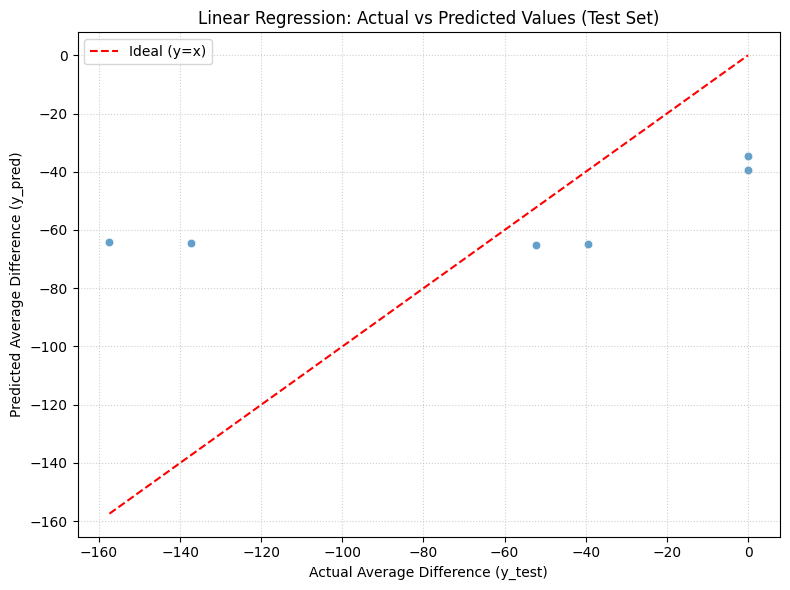

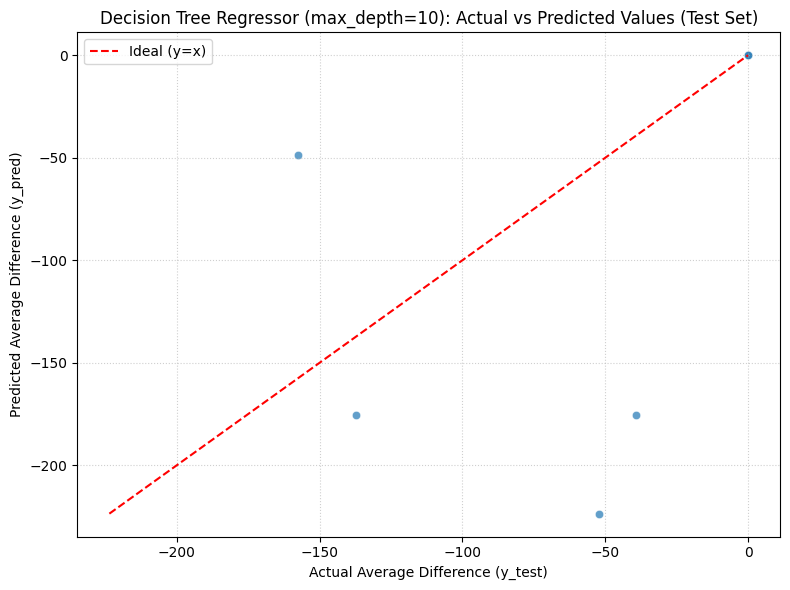

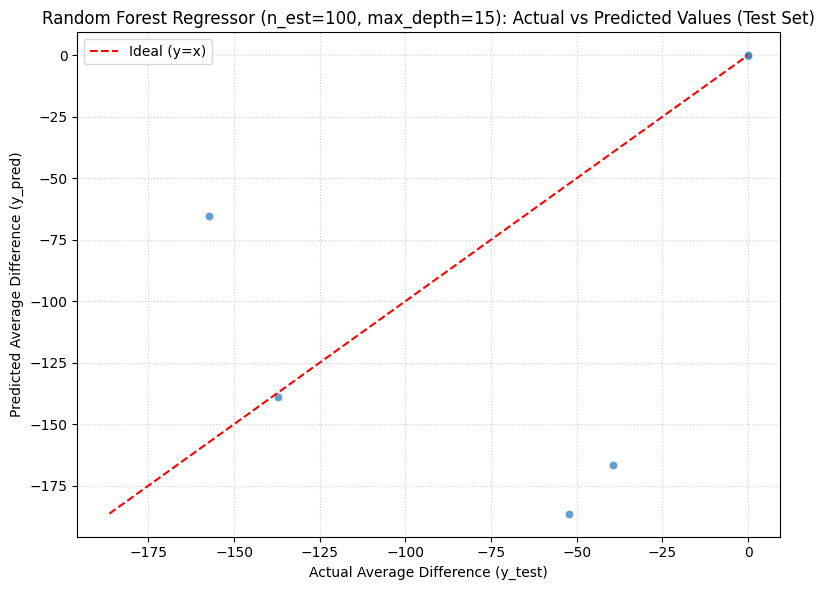

In [10]:
for model_name, res in results.items():
    y_pred = res['y_pred']

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    
    # Diagonal chiziqni chizamiz (y=x)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal (y=x)')

    plt.title(f'{model_name}: Actual vs Predicted Values (Test Set)')
    plt.xlabel('Actual Average Difference (y_test)')
    plt.ylabel('Predicted Average Difference (y_pred)')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Answer the question
Ideal holatdagi regressiya modelining `diagonal` grafigi y=x chizig'iga to'liq mos keladigan nuqtalardan iborat bo'ladi